## Carga Inicial y Exploración de datos

In [1]:
from netCDF4 import Dataset

In [2]:
nc_data = Dataset('OZONO/MENSUAL/M2TMNXSLV/MERRA2_400.tavgM_2d_slv_Nx.202412.nc4', 'r')
print(nc_data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Contact: http://gmao.gsfc.nasa.gov
    History: Original file generated: Sat Jan 11 23:40:06 2025 GMT
    Filename: MERRA2_400.tavgM_2d_slv_Nx.202412.nc4
    Comment: GMAO filename: d5124_m2_jan10.tavg1_2d_slv_Nx.monthly.202412.nc4
    Source: CVS tag: GEOSadas-5_12_4_p39_SLES12_M2-OPS experiment_id: d5124_m2_jan10
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2TMNXSLV
    RangeBeginningDate: 2024-12-01
    RangeEndingDate: 2024-12-31
    GranuleID: MERRA2_400.tavgM_2d_slv_Nx.202412.nc4
    ProductionDateTime: Original file generated: Sat Jan 11 23:40:06 2025 GMT
    LongName: MERRA2 tavg1_2d_slv_Nx: 2d,1-Hourly,Time-Ave

In [3]:
print(nc_data.variables['TO3'])

<class 'netCDF4._netCDF4.Variable'>
float32 TO3(time, lat, lon)
    long_name: total_column_ozone
    units: Dobsons
    _FillValue: 1000000000000000.0
    missing_value: 1000000000000000.0
    fmissing_value: 1000000000000000.0
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
unlimited dimensions: time
current shape = (1, 361, 576)
filling on


## Visualización en mapa mundial

In [4]:
from matplotlib.colors import LinearSegmentedColormap

In [5]:
# 1. Define a custom colormap similar to the image
colors = [
    (0.6, 0.0, 0.0),    # dark red
    (1.0, 0.4, 0.2),    # orange-red
    (1.0, 0.9, 0.5),    # light yellow
    (0.7, 0.9, 0.7),    # pale green
    (0.4, 0.7, 0.9),    # light blue
    (0.2, 0.4, 0.8),    # medium blue
    (0.1, 0.2, 0.4)     # dark blue
]
custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)
custom_cmap = custom_cmap.reversed()

C:\Users\emanu\Anaconda3\envs\nc4_env\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\emanu\Anaconda3\envs\nc4_env\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


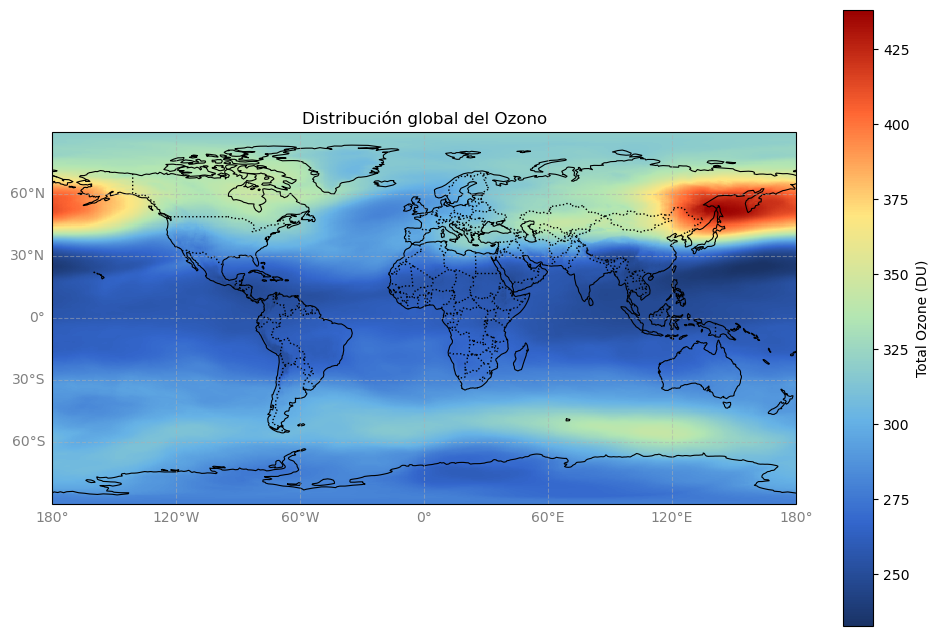

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Extraer la data
lon = nc_data.variables['lon'][:]  # Longitude
lat = nc_data.variables['lat'][:]  # Latitude
ozone = nc_data.variables['TO3'][0, :, :]  # Data de Ozono

# Crear la figura
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree projection (latitude/longitude)

# Features del mapa
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot del ozono en el mapa
mesh = plt.pcolormesh(lon, lat, ozone, transform=ccrs.PlateCarree(), cmap=custom_cmap)
plt.colorbar(mesh, orientation='vertical', label='Total Ozone (DU)')  # Adjust label based on your units

# Agregar lineas grices
gridlines = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gridlines.xlabels_top = False  # Disable labels at the top
gridlines.ylabels_right = False  # Disable labels on the right
gridlines.xlabel_style = {'size': 10, 'color': 'gray'}
gridlines.ylabel_style = {'size': 10, 'color': 'gray'}

# Títulos
plt.title('Distribución global del Ozono')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

## Visualización en mapa de uruguay

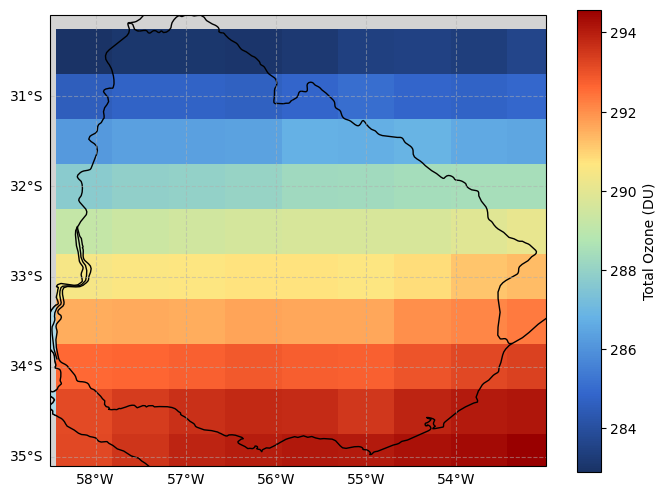

In [18]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np

# Extract data
lon = nc_data.variables['lon'][:]
lat = nc_data.variables['lat'][:]
ozone = nc_data.variables['TO3'][0, :, :]  # First time step

# Convert longitudes from [0, 360] to [-180, 180] if needed
lon = np.where(lon > 180, lon - 360, lon)

# Uruguay bounding box
lon_min, lon_max = -58.5, -53.0
lat_min, lat_max = -35.1, -30.1

# Get index range for the bounding box
lon_idx = np.where((lon >= lon_min) & (lon <= lon_max))[0]
lat_idx = np.where((lat >= lat_min) & (lat <= lat_max))[0]

# Subset the data
ozone_subset = ozone[np.min(lat_idx):np.max(lat_idx)+1, np.min(lon_idx):np.max(lon_idx)+1]
lon_subset = lon[lon_idx]
lat_subset = lat[lat_idx]

# Create the plot
plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set extent to Uruguay
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot the ozone data
lon_grid, lat_grid = np.meshgrid(lon_subset, lat_subset)
mesh = ax.pcolormesh(lon_grid, lat_grid, ozone_subset, cmap=custom_cmap, transform=ccrs.PlateCarree())
plt.colorbar(mesh, orientation='vertical', label='Total Ozone (DU)')

# Gridlines
gridlines = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gridlines.top_labels = False
gridlines.right_labels = False

# Title
#plt.title('Ozone over Uruguay')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


## Comparación con archivo extraido manualmente

In [8]:
nc_data = Dataset('OZONO/MENSUAL/M2TMNXSLV/MERRA2_400.tavgM_2d_slv_Nx.202412.nc4', 'r')

lon = nc_data.variables['lon'][:]
lat = nc_data.variables['lat'][:]
ozone = nc_data.variables['TO3'][0, :, :]

lon_min, lon_max = -58.5, -53.0
lat_min, lat_max = -35.1, -30.1

lon_idx = np.where((lon >= lon_min) & (lon <= lon_max))[0]
lat_idx = np.where((lat >= lat_min) & (lat <= lat_max))[0]

ozone_subset = ozone[np.min(lat_idx):np.max(lat_idx)+1, np.min(lon_idx):np.max(lon_idx)+1].data

print(ozone_subset)

[[293.20822 293.54898 293.86835 294.00488 294.08035 294.05814 294.22882
  294.39542 294.57883]
 [293.16125 293.4026  293.65216 293.76413 293.75256 293.50247 293.89096
  294.06866 294.16495]
 [292.5803  292.62766 292.73346 292.84692 292.77298 292.70975 292.9675
  293.18304 293.34198]
 [291.56708 291.5685  291.5653  291.67297 291.646   291.62723 292.00354
  292.14075 292.30023]
 [290.43692 290.581   290.6387  290.72183 290.7347  290.64825 290.82272
  291.16034 291.3076 ]
 [289.18542 289.33383 289.4751  289.58786 289.67694 289.65552 289.6852
  289.92264 290.07727]
 [287.72577 287.87552 287.94708 288.02374 288.2733  288.29874 288.40036
  288.4253  288.43253]
 [286.1392  286.322   286.3492  286.37186 286.74023 286.70676 286.82474
  286.54968 286.4719 ]
 [284.54733 284.73776 284.75146 284.6588  284.84146 285.07272 284.84344
  284.75928 284.86343]
 [282.89926 283.06174 283.05783 283.0336  283.14194 283.41705 283.48795
  283.312   283.6157 ]]


In [9]:
nc_data_2 = Dataset('OZONO/MENSUAL/M2TMNXSLV/g4timeAvgMapM2TMNXSLV_5_12_4_TO320241201-2024123158W_35S_53W_30S.nc', 'r')
ozone_data_giovanni = nc_data_2.variables['M2TMNXSLV_5_12_4_TO3'][:,:]
print(ozone_data_giovanni)

[[293.20822 293.54898 293.86835 294.00488 294.08035 294.05814 294.22882
  294.39542 294.57883]
 [293.16125 293.4026  293.65216 293.76413 293.75256 293.50247 293.89096
  294.06866 294.16495]
 [292.5803  292.62766 292.73346 292.84692 292.77298 292.70975 292.9675
  293.18304 293.34198]
 [291.56708 291.5685  291.5653  291.67297 291.646   291.62723 292.00354
  292.14075 292.30023]
 [290.43692 290.581   290.6387  290.72183 290.7347  290.64825 290.82272
  291.16034 291.3076 ]
 [289.18542 289.33383 289.4751  289.58786 289.67694 289.65552 289.6852
  289.92264 290.07727]
 [287.72577 287.87552 287.94708 288.02374 288.2733  288.29874 288.40036
  288.4253  288.43253]
 [286.1392  286.322   286.3492  286.37186 286.74023 286.70676 286.82474
  286.54968 286.4719 ]
 [284.54733 284.73776 284.75146 284.6588  284.84146 285.07272 284.84344
  284.75928 284.86343]
 [282.89926 283.06174 283.05783 283.0336  283.14194 283.41705 283.48795
  283.312   283.6157 ]]


In [10]:
ozone_data_giovanni - ozone_subset

masked_array(
  data=[[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

## Crear pandas dataframe de los datos

In [11]:
# Referencias obtenidas del archivo particular
print(nc_data_2.variables['lat'][:])
print(nc_data_2.variables['lon'][:])

[-35.  -34.5 -34.  -33.5 -33.  -32.5 -32.  -31.5 -31.  -30.5]
[-58.125 -57.5   -56.875 -56.25  -55.625 -55.    -54.375 -53.75  -53.125]


In [28]:
# Referencias de nuestro archivo original
lon = nc_data.variables['lon'][:]
lat = nc_data.variables['lat'][:]
ozone = nc_data.variables['TO3'][0, :, :]

lon_min, lon_max = -58.5, -53.0
lat_min, lat_max = -35.1, -30.1

lon_val = lon[(lon >= lon_min) & (lon <= lon_max)]
lat_val = lat[(lat >= lat_min) & (lat <= lat_max)]

lon_idx = np.where((lon >= lon_min) & (lon <= lon_max))[0]
lat_idx = np.where((lat >= lat_min) & (lat <= lat_max))[0]

ozone_subset = ozone[np.min(lat_idx):np.max(lat_idx)+1, np.min(lon_idx):np.max(lon_idx)+1].data

print('Lista completa de valores de latitud y longitud')
print(lat_val)
print(lon_val)

Lista completa de valores de latitud y longitud
[-35.  -34.5 -34.  -33.5 -33.  -32.5 -32.  -31.5 -31.  -30.5]
[-58.125 -57.5   -56.875 -56.25  -55.625 -55.    -54.375 -53.75  -53.125]


In [30]:
X = []

for l_lat in lat_idx:
    for l_lon in lon_idx:
        x = []
        x.append(lat[l_lat])
        x.append(lon[l_lon])
        x.append(ozone[l_lat,l_lon])
        X.append(x)
        
X = np.asarray(X)

In [34]:
import pandas as pd

df = pd.DataFrame(X, columns = ['Latitud', 'Longitud', 'Ozono'])

df

,Latitud,Longitud,Ozono
0,-35.0,-58.125,293.208221
1,-35.0,-57.500,293.548981
2,-35.0,-56.875,293.868347
3,-35.0,-56.250,294.004883
4,-35.0,-55.625,294.080353
...,...,...,...
85,-30.5,-55.625,283.141937
86,-30.5,-55.000,283.417053
87,-30.5,-54.375,283.487946
88,-30.5,-53.750,283.312012


In [40]:
nombre_archivo = 'MERRA2_400.tavgM_2d_slv_Nx.202412.nc4'

fecha = nombre_archivo.split('.')[2]

df['Fecha'] = fecha

df

,Latitud,Longitud,Ozono,Fecha
0,-35.0,-58.125,293.208221,202412
1,-35.0,-57.500,293.548981,202412
2,-35.0,-56.875,293.868347,202412
3,-35.0,-56.250,294.004883,202412
4,-35.0,-55.625,294.080353,202412
...,...,...,...,...
85,-30.5,-55.625,283.141937,202412
86,-30.5,-55.000,283.417053,202412
87,-30.5,-54.375,283.487946,202412
88,-30.5,-53.750,283.312012,202412
